# Gotland Basin

This notebook plots the Hovmoller diagrams of the simulated temperature in the [Gotland deep](https://gotm.net/cases/gotland_deep/) test case. 

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *

## Load data

First, store the information of the four simulations into lists and dictionaries.

In [2]:
casenames = [
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    'GLS-C01A',
    ]

colors = {
    'GLS-C01A': 'tab:blue',
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

casedir = '../gotm/run/Gotland_wave'
save_fig = True

Load data into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

## Figure

Hovmoller diagrams comparing the simulated temperature between the four vertical mixing schemes.

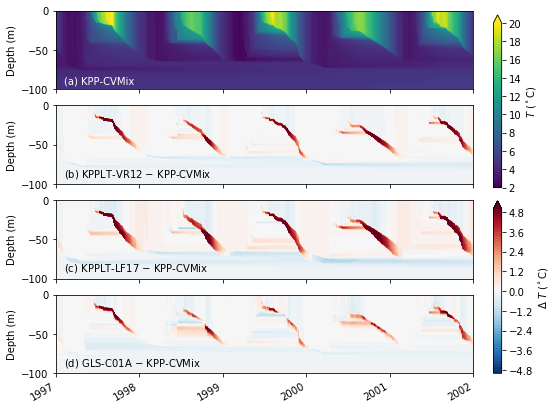

In [4]:
fig, axarr = plt.subplots(4, sharex='col')
fig.set_size_inches([8,6])

data0 = dataset['KPP-CVMix'].temp[:,:,0,0]
levels = np.linspace(2, 20, 91)
im0 = data0.plot.contourf(ax=axarr[0], levels=levels, add_colorbar=False)
# axarr[0].set_title(labels[0])
levels_diff = np.linspace(-5, 5, 51)
j = 0
labels = ['KPP-CVMix']
for case in casenames:
    if case != 'KPP-CVMix':
        j += 1
        diff = dataset[case].temp[:,:,0,0] - data0
        diff.attrs['long_name'] = '$\Delta$ '+ data0.attrs['long_name']
        diff.attrs['units'] = data0.attrs['units']
        im1 = diff.plot.contourf(ax=axarr[j], levels=levels_diff, add_colorbar=False)
        labels.append(case+' $-$ KPP-CVMix')

colors = ['w', 'k', 'k', 'k']
for j in np.arange(4):
    ax = axarr[j]
    ax.set_ylim([-100,0])
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('')
    ax.set_title('')
    ax.text(0.02, 0.05, '('+string.ascii_lowercase[j]+') '+labels[j],
            transform=ax.transAxes, color=colors[j],
            va='bottom', ha='left')
    
plt.subplots_adjust(top=0.96, bottom=0.12, right=0.85, hspace=0.2, wspace=0.15)

label_str = '$T$ ($^\circ$C)'
cax0 = plt.axes([0.8, 0.55, 0.1, 0.4])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0)
cb0.formatter.set_powerlimits((-2, 2)) 
cb0.update_ticks()
cb0.set_label(label_str)
cax1 = plt.axes([0.8, 0.12, 0.1, 0.4])
cax1.set_visible(False)
cb1 = plt.colorbar(im1, ax=cax1)
cb1.formatter.set_powerlimits((-2, 2)) 
cb1.update_ticks()
cb1.set_label(r'$\Delta$ '+label_str)

if save_fig:
    figname = 'gotland_wave_hovmoller.pdf'
    fig.savefig(figname, dpi=300)